# Assignment 1: Yelp Reviews Classification
## Text Cleaning and Machine Learning Model Comparison

### Data Acquisition

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
original = pd.read_csv('yelp_reviews.csv')
required_data = original[['text', 'stars']]
required_data

,text,stars
0,Great place for takeout! Highlights of the mea...,5
1,We love Debbie does Doberge so we had to try D...,5
2,"It's a nice family run restaurant, right next ...",5
3,These guys come around every few months trying...,1
4,La Caleñita this morning made me beat anyone's...,5
...,...,...
795,Yesterday about 3 pm I was on my way back to T...,5
796,My husband arrived early Sunday morning and it...,2
797,SAVE YOUR MONEY!!! \n\nFirst time hiring a mov...,1
798,When we want a donut this is it! Full of flavo...,5


In [2]:
# Check for any missing values
required_data.isnull().sum()

text     0
stars    0
dtype: int64

In [3]:
# Check the distribution of star ratings
required_data['stars'].value_counts().sort_index()

stars
1    156
2     56
3     68
4    156
5    364
Name: count, dtype: int64

### Text Cleaning and Pre-Processing

In [4]:
import re
import string
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [5]:
def clean_preprocess(text):
    """
    Clean and preprocess text data:
    - Lowercase the text
    - Remove URLs
    - Remove unwanted Unicode characters
    - Remove punctuation
    - Remove digits
    - Remove stop words
    - Keep only alphabet characters
    """
    # Lowercase
    outtext = text.lower()
    
    # Remove URLs (http, https, www)
    outtext = re.sub(r'http\S+|www\S+|https\S+', '', outtext, flags=re.MULTILINE)
    
    # Remove unwanted Unicode characters (keep only ASCII)
    outtext = outtext.encode('ascii', 'ignore').decode('ascii')
    
    # Remove HTML tags if any
    outtext = re.sub(r'<.*?>', ' ', outtext)
    
    # Remove digits
    outtext = re.sub(r'\d+', '', outtext)
    
    # Remove punctuation
    outtext = outtext.translate(str.maketrans('', '', string.punctuation))
    
    # Process with spacy and remove stop words
    doc = nlp(outtext)
    outtext = [token.text for token in doc if token.text not in ENGLISH_STOP_WORDS]
    
    # Keep only words with alphabet characters
    outtext = [word for word in outtext if word.isalpha()]
    
    # Join list of words into a sentence
    processed_text = ' '.join(outtext)
    
    return processed_text

In [6]:
# Test the cleaning function with a sample
sample_text = "Great place! I visited on 3/29/2021. Check out http://example.com for more info. 5 stars!!!"
print("Original:", sample_text)
print("Cleaned:", clean_preprocess(sample_text))

Original: Great place! I visited on 3/29/2021. Check out http://example.com for more info. 5 stars!!!
Cleaned: great place visited check info stars


In [7]:
# Apply cleaning to all text data
required_data['text'] = required_data['text'].apply(lambda row: clean_preprocess(row))

In [8]:
# Display cleaned data
required_data.head()

,text,stars
0,great place takeout highlights meal honey cake...,5
1,love debbie does doberge try debbie levee disa...,5
2,nice family run restaurant right yats actually...,5
3,guys come months trying sell siding windows en...,1
4,la caleita morning beat anyones mark picked fr...,5


In [9]:
# Remove any rows with empty text after cleaning
required_data = required_data[required_data['text'].str.strip() != '']
print(f"Dataset size after removing empty texts: {len(required_data)}")

Dataset size after removing empty texts: 800


### Feature Engineering or Text Representation

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Create bag of words representation
vect = CountVectorizer(max_features=5000)
x_data = vect.fit_transform(required_data['text'])
y_data = required_data['stars']

print(f"Feature matrix shape: {x_data.shape}")
print(f"Target variable shape: {y_data.shape}")

Feature matrix shape: (800, 5000)
Target variable shape: (800,)


### Building Machine Learning Models

In [12]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

In [13]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 600
Test set size: 200


#### Model 1: Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
model1 = MultinomialNB()
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)

#### Model 2: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Train the model
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

#### Model 3: Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

# Make predictions
y_pred3 = model3.predict(X_test)

### Evaluating and Comparing Models

In [26]:

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib as plt

In [20]:
# Calculate accuracy scores
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

print("="*60)
print("MODEL ACCURACY COMPARISON")
print("="*60)
print(f"Multinomial Naive Bayes Accuracy: {accuracy1:.4f}")
print(f"Logistic Regression Accuracy: {accuracy2:.4f}")
print(f"Random Forest Accuracy: {accuracy3:.4f}")
print("="*60)

MODEL ACCURACY COMPARISON
Multinomial Naive Bayes Accuracy: 0.5650
Logistic Regression Accuracy: 0.6100
Random Forest Accuracy: 0.5650


### Confusion Matrices

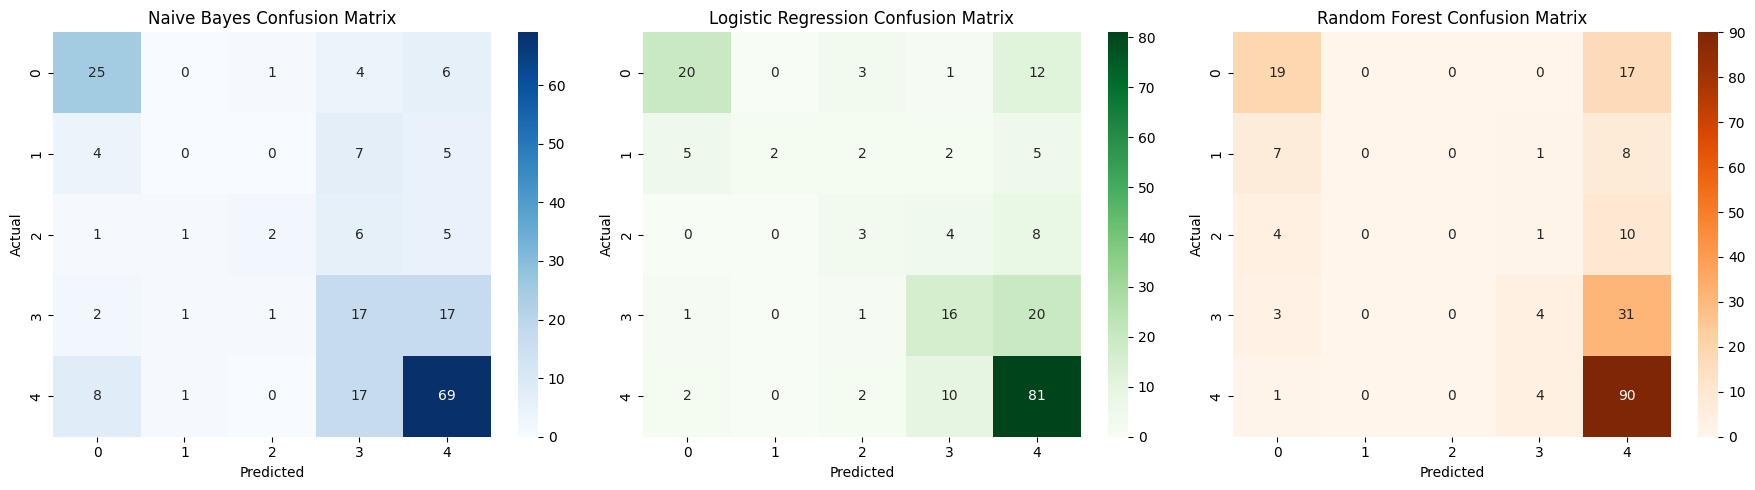

In [25]:
# Create confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Conclusion

Based on the accuracy scores and classification reports above, we can determine which model performs best for predicting Yelp star ratings from review text. The model with the highest accuracy score provides the most reliable predictions for this classification task.